<a href="https://colab.research.google.com/github/armandossrecife/my_evaluation/blob/main/revisar_experimentos_activemq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache ActiveMQ Dataset

**Review Apache ActiveMQ Dataset generated by ATDCodeAnalyser experiment**


## Prepara ambiente

In [ ]:
!rm -rf /content/activemq

In [ ]:
!git clone https://github.com/apache/activemq.git

Cloning into 'activemq'...
remote: Enumerating objects: 239298, done.
remote: Counting objects: 100% (1056/1056), done.
remote: Compressing objects: 100% (431/431), done.
remote: Total 239298 (delta 484), reused 968 (delta 428), pack-reused 238242
Receiving objects: 100% (239298/239298), 61.83 MiB | 17.75 MiB/s, done.
Resolving deltas: 100% (115776/115776), done.


In [ ]:
!pip3 install pydriller

In [ ]:
!wget https://github.com/armandossrecife/my_evaluation/raw/main/activemq/top20classesactivemq2.xlsx

## Funções de Apoio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create the boxplot
def generate_boxsplot(coluna, my_title, xlabel, ylabel, outliers=True):
  plt.figure(figsize=(10, 6))
  plt.boxplot(coluna, showfliers=outliers)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(my_title)
  plt.grid(True)
  plt.show()

def clean_and_format_df(df_original):
  df = df_original.copy()
  # Handle missing values (if any) in the 'time_resolution' column
  df.dropna(subset=['time_resolution'], inplace=True)
  # Extract the numeric part (assuming format "X days")
  df['time_resolution_days'] = df['time_resolution'].str.extract('(\d+)').astype(int)

  return df

def clean_and_format_df2(df_original):
  df = df_original.copy()
  # Handle missing values (if any) in the 'time_resolution' column
  df.dropna(subset=['time_resolution'], inplace=True)
  # Extract the numeric part (assuming format "X days")
  df['time_resolution_days'] = df['time_resolution']

  return df


import re

def extract_activemq_id(text):
  """
  This function extracts the pattern AMQ- followed by any digits from a text string.

  Args:
      text: The text string to search.

  Returns:
      A string containing the extracted ID (e.g., "AMQ-123") or None if not found.
  """
  my_match = re.search(r"AMQ-(\d+)", text)
  if my_match:
    return my_match.group(0)  # Return the entire matched string
  else:
    return None


def get_issue_id_by_commit(df, my_hash):
  resultado_linha = df[df['commit']==my_hash].issue_id
  index = resultado_linha.index[0]
  resultado = resultado_linha[index]
  return resultado

def remove_caracteres(my_text):
  my_text = my_text.replace("['", "")
  my_text = my_text.replace("']", "")
  my_text = my_text.replace("', '", ",")
  my_text = my_text.replace("','", ",")
  return my_text

## 1. Issues in commits with critical files

Lista de issues que aparecem nas mensagens dos commits com classes críticas

In [ ]:
url_file2= "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/activemq/activemq_issues_in_commits_with_critical_classes.xlsx"
df_activemq_issues_in_commits_arquivos_criticos = pd.read_excel(url_file2)
df_activemq_issues_in_commits_arquivos_criticos

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,AMQ-2199,Bug,Resolved,NullPointerException during broker start on br...,2009-04-08,2009-04-09,1 days
1,AMQ-2198,Improvement,Resolved,Allow suppression of duplicate queue subscript...,2009-04-07,2009-04-07,0 days
2,AMQ-2183,Bug,Resolved,Master/slave out of sync with multiple consume...,2009-03-25,2010-04-27,398 days
3,AMQ-2180,Improvement,Resolved,infinite networkTTL,2009-03-24,2010-06-16,449 days
4,AMQ-2149,Bug,Resolved,Shared Filesystem Master Slave: missing messages,2009-03-06,2009-05-23,78 days
...,...,...,...,...,...,...,...
475,AMQ-9153,Bug,Resolved,Fix Slow Consumer Advisory for Queue subscript...,2022-11-01,2022-11-01,0 days
476,AMQ-9262,Bug,Resolved,Composite consumers do not work properly with ...,2023-06-06,2023-06-07,1 days
477,AMQ-9257,Improvement,Resolved,Disabled expire message checking when pauseDis...,2023-05-10,2023-06-19,40 days
478,AMQ-9239,New Feature,Closed,Jakarta JMS package namespace for broker,2023-03-30,2023-08-30,153 days


In [ ]:
# Faz a limpeza e formatação dos dados
df_issues2 = clean_and_format_df(df_original=df_activemq_issues_in_commits_arquivos_criticos)
df_issues2

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution,time_resolution_days
0,AMQ-2199,Bug,Resolved,NullPointerException during broker start on br...,2009-04-08,2009-04-09,1 days,1
1,AMQ-2198,Improvement,Resolved,Allow suppression of duplicate queue subscript...,2009-04-07,2009-04-07,0 days,0
2,AMQ-2183,Bug,Resolved,Master/slave out of sync with multiple consume...,2009-03-25,2010-04-27,398 days,398
3,AMQ-2180,Improvement,Resolved,infinite networkTTL,2009-03-24,2010-06-16,449 days,449
4,AMQ-2149,Bug,Resolved,Shared Filesystem Master Slave: missing messages,2009-03-06,2009-05-23,78 days,78
...,...,...,...,...,...,...,...,...
475,AMQ-9153,Bug,Resolved,Fix Slow Consumer Advisory for Queue subscript...,2022-11-01,2022-11-01,0 days,0
476,AMQ-9262,Bug,Resolved,Composite consumers do not work properly with ...,2023-06-06,2023-06-07,1 days,1
477,AMQ-9257,Improvement,Resolved,Disabled expire message checking when pauseDis...,2023-05-10,2023-06-19,40 days,40
478,AMQ-9239,New Feature,Closed,Jakarta JMS package namespace for broker,2023-03-30,2023-08-30,153 days,153


## 2. Commits with critical files

Lista de commits com as classes críticas

In [ ]:
url_file5 = "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/activemq/activemq_commits_with_critical_classes.xlsx"
df_activemq_commits_arquivos_criticos = pd.read_excel(url_file5)
df_activemq_commits_arquivos_criticos['commit'] = df_activemq_commits_arquivos_criticos['hash']
df_activemq_commits_arquivos_criticos

,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,commit
0,07b6a38336a62913d42817a89cdc821a89419b7f,AMQ-2053 introduce methods to remove (closed) ...,7/1/2009,164,12,['Queue.java'],"['AbstractRegion.java', 'DestinationFactory.ja...","[{'Queue.java': '@@ -850,9 +850,9 @@ public cl...","['@@ -203,7 +203,7 @@ public abstract class Ab...",07b6a38336a62913d42817a89cdc821a89419b7f
1,807f64591dcd4e0e496dc5795405812129d0d062,Recovery dispatch refactoring as the part of t...,22/1/2009,54,2,"['Queue.java', 'QueueDispatchSelector.java']","['Queue.java', 'QueueDispatchSelector.java']","[{'Queue.java': '@@ -233,16 +233,18 @@ public ...","['@@ -233,16 +233,18 @@ public class Queue ext...",807f64591dcd4e0e496dc5795405812129d0d062
2,a321204079f435deaf8d082fb3de95c5c792c7f2,fix for http://issues.apache.org/activemq/brow...,23/1/2009,317,3,['Queue.java'],"['Queue.java', 'PolicyEntry.java', 'MessageGro...","[{'Queue.java': '@@ -27,12 +27,16 @@ import ja...","['@@ -27,12 +27,16 @@ import java.util.LinkedL...",a321204079f435deaf8d082fb3de95c5c792c7f2
3,977393d9e74364c21260f00d2fe0e314c77f9afa,fix for http://issues.apache.org/activemq/brow...,23/1/2009,170,4,['QueueDispatchSelector.java'],"['QueueDispatchSelector.java', 'JmsTestSupport...","[{'QueueDispatchSelector.java': '@@ -70,7 +70,...","['@@ -70,7 +70,7 @@ public class QueueDispatch...",977393d9e74364c21260f00d2fe0e314c77f9afa
4,39dd6b914a6954bf8f7114e97831482fd616e8bb,fix for https://issues.apache.org/activemq/bro...,27/1/2009,238,4,['DemandForwardingBridgeSupport.java'],"['DemandForwardingBridgeSupport.java', 'TestBr...",[{'DemandForwardingBridgeSupport.java': '@@ -4...,"['@@ -441,6 +441,9 @@ public abstract class De...",39dd6b914a6954bf8f7114e97831482fd616e8bb
...,...,...,...,...,...,...,...,...,...,...
716,9a5b61f6a28184cfe832871302ece16069ebb71d,[AMQ-9257] Disabled expire message checking wh...,19/5/2023,75,3,"['Queue.java', 'QueueDispatchSelector.java']","['Queue.java', 'QueueDispatchSelector.java', '...","[{'Queue.java': '@@ -957,6 +957,11 @@ public c...","['@@ -957,6 +957,11 @@ public class Queue exte...",9a5b61f6a28184cfe832871302ece16069ebb71d
717,901956d4ddb6a0ea9fe5fedf39732117ab68f087,AMQ-9262 - Fix network subscriptions for compo...,7/6/2023,619,5,['DemandForwardingBridgeSupport.java'],"['DemandForwardingBridgeSupport.java', 'Compos...","[{'DemandForwardingBridgeSupport.java': ""@@ -2...","[""@@ -24,6 +24,7 @@ import java.util.Collectio...",901956d4ddb6a0ea9fe5fedf39732117ab68f087
718,95e3c2a1aa0d4962ad6a22a4422a9314875f824b,[AMQ-9233] Prevent NPE in SubQueueSelectorCach...,22/6/2023,2,1,['SubQueueSelectorCacheBroker.java'],['SubQueueSelectorCacheBroker.java'],[{'SubQueueSelectorCacheBroker.java': '@@ -180...,"['@@ -180,7 +180,7 @@ public class SubQueueSel...",95e3c2a1aa0d4962ad6a22a4422a9314875f824b
719,3ba93ed9579bbe90967312fba78726d96239110a,Remove unnecessary boxing / unboxing,23/7/2023,1307,111,"['DurableTopicSubscription.java', 'Queue.java']","['InboundTransformer.java', 'AmqpConnection.ja...","[{'DurableTopicSubscription.java': '@@ -227,9 ...","['@@ -90,7 +90,7 @@ public abstract class Inbo...",3ba93ed9579bbe90967312fba78726d96239110a


## 3. Commits with issues with architectural impact

Lista de commits com issues com impacto arquitetural

In [ ]:
url_file4 = "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/activemq/activemq_commits_issues_yes_ai_satd.xlsx"
df_activemq_commits_issues_yes_ai_satd = pd.read_excel(url_file4)
df_activemq_commits_issues_yes_ai_satd

,commits,msg,lines,files,comments
0,08aecbee6e9754e696f3bdf64634263dc73cb5c5,partial fix for AMQ2149|http://issues.apache.o...,290,6,['debug']
1,132f662209f7e25a1d9c240fdddcf61e0ed1226c,resolve AMQ-2149|https://issues.apache.org/act...,326,21,['test']
2,83128fc45b65aff89ba78596a158a01960029742,https://issues.apache.org/activemq/browse/AMQ-...,236,3,['exception']
3,306f8a0774b7892ba1b572e1faea15847711b4ba,resolve https://issues.apache.org/activemq/bro...,231,8,"['update', 'update']"
4,8bf987b134bd827b93ed8157b323bc3bd2d8a82e,https://issues.apache.org/jira/browse/AMQ-3177...,4738,570,"['test', 'test', 'test', 'test', 'test']"
5,cb967831d62231694a003cf5d9468da2e890d36d,https://issues.apache.org/jira/browse/AMQ-3188...,463,12,"['update', 'test', 'dependencies']"
6,b9045dba98f053e31fb93922978334b126ad146b,https://issues.apache.org/jira/browse/AMQ-3253...,327,15,"['fix', 'fix']"
7,8ce077800fdfa5aca341734cbc4ec69e5e645c61,https://issues.apache.org/jira/browse/AMQ-3551...,168,4,['test']
8,332c35ca18fba9316480160d4d294abda4e680bc,https://issues.apache.org/jira/browse/AMQ-3384...,154,5,['fix']
9,cb1b92bf58e2631077a31b97cc8087bb35605a03,apply patch and add test for: https://issues.a...,438,5,"['test', 'design']"


In [ ]:
# Apply extract_cassandra_id function to 'my_text' column and add a new column
df_activemq_commits_issues_yes_ai_satd['issue_id'] = df_activemq_commits_issues_yes_ai_satd['msg'].apply(extract_activemq_id)
df_activemq_commits_issues_yes_ai_satd['commit'] = df_activemq_commits_issues_yes_ai_satd['commits']

## 4. Relação Commits, Classes Críticas, Issues_id

In [ ]:
df_teste = pd.read_excel('https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/activemq/activemq_commits_critical_files_issues_id_yes_ai_satd.xlsx')
df_teste

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,commit,critical_files,modified_files,issue_id
0,08aecbee6e9754e696f3bdf64634263dc73cb5c5,"['Queue.java','QueueDispatchSelector.java']","['Queue.java', 'AbstractStoreCursor.java', 'Ka...",AMQ-2149
1,132f662209f7e25a1d9c240fdddcf61e0ed1226c,['Queue.java'],"['ActiveMQMessageConsumer.java', 'TransactionC...",AMQ-2149
2,83128fc45b65aff89ba78596a158a01960029742,['Queue.java'],"['Queue.java', 'SystemUsage.java', 'JmsTimeout...",AMQ-2507
3,306f8a0774b7892ba1b572e1faea15847711b4ba,"['DurableTopicSubscription.java','TransportCon...","['AbstractSubscription.java', 'DurableTopicSub...",AMQ-2870
4,8bf987b134bd827b93ed8157b323bc3bd2d8a82e,"['BrokerService.java', 'TransportConnector.jav...","['pom.xml', 'pom.xml', 'CamelEndpointLoader.ja...",AMQ-3177
5,cb967831d62231694a003cf5d9468da2e890d36d,['DurableTopicSubscription.java'],"['DurableTopicSubscription.java', 'PrefetchSub...",AMQ-3188
6,b9045dba98f053e31fb93922978334b126ad146b,"['BrokerService.java', 'Queue.java','BrokerSer...","['CamelConnection.java', 'CamelConnectionFacto...",AMQ-3253
7,8ce077800fdfa5aca341734cbc4ec69e5e645c61,['Queue.java'],"['BaseDestination.java', 'Queue.java', 'Topic....",AMQ-3551
8,332c35ca18fba9316480160d4d294abda4e680bc,['DemandForwardingBridgeSupport.java'],"['DemandForwardingBridgeSupport.java', 'Networ...",AMQ-3384
9,cb1b92bf58e2631077a31b97cc8087bb35605a03,['Queue.java'],"['Queue.java', 'OrderedPendingList.java', 'Pen...",AMQ-3436


In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   commit          18 non-null     object
 1   critical_files  18 non-null     object
 2   modified_files  18 non-null     object
 3   issue_id        18 non-null     object
dtypes: object(4)
memory usage: 704.0+ bytes


In [ ]:
df_teste['modified_files2'] = df_teste.modified_files.apply(remove_caracteres)

In [ ]:
# Lista de commits (hash) que aparecem na análise crítica
my_commits = df_teste['commit'].to_list()
print(f"Qtd commits com classes críticas e issues com impacto arquitetural: {len(my_commits)}")

Qtd commits com classes críticas e issues com impacto arquitetural: 18


In [ ]:
get_issue_id_by_commit(df=df_teste, my_hash='de3f77063fa579159184d23ac98df97e80d63327')

'AMQ-7234'

## 5. Calcula a quantidade de issues com impacto arquitetural para as classes do projeto analisado

In [ ]:
lista_modified_files_temp2 = []
lista_t1 = df_teste['modified_files2'].to_list()

for each in lista_t1:
  temp = each.split(',')
  for item in temp:
    lista_modified_files_temp2.append(item)

In [ ]:
set_modified_files2 = set(lista_modified_files_temp2)
my_file = 'ccqtdissuesactivemq2.csv'

with open(my_file, mode='w') as f:
  f.write('elemento,qtd')
  f.write('\n')
  for elemento in set_modified_files2:
    conta = lista_modified_files_temp2.count(elemento)
    f.write(f"{elemento},{conta}")
    f.write('\n')

In [ ]:
df_ccqtdissues = pd.read_csv('ccqtdissuesactivemq2.csv')
df_ccqtdissues = df_ccqtdissues.sort_values(by='qtd', ascending=False)
df_ccqtdissues

df_top_21_classes_iai = df_ccqtdissues.head(21)
df_top_21_classes_iai

lista_top_21_classes_iai = df_top_21_classes_iai.elemento.to_list()
lista_qtd_top_21 = df_top_21_classes_iai.qtd.to_list()

dict_final = {
    'classes':lista_top_21_classes_iai,
    'qtd_issues_with_architectural_impact':lista_qtd_top_21
}

df_final = pd.DataFrame(dict_final)
df_final

,classes,qtd_issues_with_architectural_impact
0,pom.xml,15
1,Queue.java,12
2,BrokerService.java,5
3,QueueDispatchSelector.java,5
4,Topic.java,4
5,AbstractStoreCursor.java,4
6,PrefetchSubscription.java,4
7,DurableTopicSubscription.java,3
8,AMQ2149Test.java,3
9,StoreDurableSubscriberCursor.java,3


In [ ]:
df_final

,classes,qtd_issues_with_architectural_impact
0,pom.xml,15
1,Queue.java,12
2,BrokerService.java,5
3,QueueDispatchSelector.java,5
4,Topic.java,4
5,AbstractStoreCursor.java,4
6,PrefetchSubscription.java,4
7,DurableTopicSubscription.java,3
8,AMQ2149Test.java,3
9,StoreDurableSubscriberCursor.java,3


In [ ]:
data = df_final.copy()
data = data.iloc[1:, :]
data

,classes,qtd_issues_with_architectural_impact
1,Queue.java,12
2,BrokerService.java,5
3,QueueDispatchSelector.java,5
4,Topic.java,4
5,AbstractStoreCursor.java,4
6,PrefetchSubscription.java,4
7,DurableTopicSubscription.java,3
8,AMQ2149Test.java,3
9,StoreDurableSubscriberCursor.java,3
10,TestSupport.java,3


In [ ]:
data.to_excel('top20classesactivemq.xlsx', index=False)

In [ ]:
df_new_data = pd.read_excel('top20classesactivemq.xlsx')
df_new_data

,classes,qtd_issues_with_architectural_impact
0,Queue.java,12
1,BrokerService.java,5
2,QueueDispatchSelector.java,5
3,Topic.java,4
4,AbstractStoreCursor.java,4
5,PrefetchSubscription.java,4
6,DurableTopicSubscription.java,3
7,AMQ2149Test.java,3
8,StoreDurableSubscriberCursor.java,3
9,TestSupport.java,3


In [ ]:
colunas = ['critical_class', 'qtd_issues_with_architectural_impact']
df_new_data2 = df_new_data[colunas]
df_new_data2

KeyError: "['critical_class'] not in index"

In [ ]:
df_data_yes = df_new_data2[df_new_data2.critical_class=='yes']
df_data_yes

In [ ]:
df_data_yes.boxplot()

In [ ]:
df_data_no = df_new_data2[df_new_data2.critical_class=='no']
df_data_no

In [ ]:
df_data_no.boxplot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_boxplot(lista_dados, my_title, my_xlabel, my_ylabel, my_labels):
  bp = plt.boxplot(lista_dados, labels=my_labels)
  plt.title(my_title)
  plt.xlabel(my_xlabel)
  plt.ylabel(my_ylabel)
  plt.show()


def create_boxplot2(lista_dados, my_title, my_xlabel, my_ylabel, my_labels):
  fig, ax1 = plt.subplots(figsize=(4, 6))
  # rectangular box plot
  bplot1 = ax1.boxplot(lista_dados,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=my_labels)  # will be used to label x-ticks
  ax1.yaxis.grid(True)
  ax1.set_xlabel(my_xlabel)
  ax1.set_ylabel(my_ylabel)

In [ ]:
create_boxplot(lista_dados=[df_data_yes.qtd_issues_with_architectural_impact, df_data_no.qtd_issues_with_architectural_impact], my_title='Critical Class x No Critical Class', my_xlabel='', my_ylabel='qtd issues with architectural impac', my_labels=['cc', 'ncc'])

In [ ]:
create_boxplot2(lista_dados=[df_data_yes.qtd_issues_with_architectural_impact, df_data_no.qtd_issues_with_architectural_impact], my_title='Critical Class x No Critical Class', my_xlabel='', my_ylabel='qtd issues with architectural impac', my_labels=['cc', 'ncc'])

In [ ]:
import seaborn as sns

In [ ]:
data['File'] = 'File'
# Acrescenta uma coluna File
df_qtd_issues = data[['qtd_issues_with_architectural_impact', 'File']]
df_qtd_issues

,qtd_issues_with_architectural_impact,File
1,12,File
2,5,File
3,5,File
4,4,File
5,4,File
6,4,File
7,3,File
8,3,File
9,3,File
10,3,File


<Axes: xlabel='File', ylabel='qtd_issues_with_architectural_impact'>

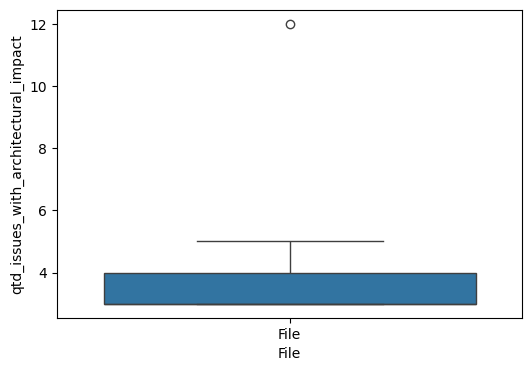

In [ ]:
# Boxplot do EM (Esforço de Manutenção de Locs Modificadas). Todos os arquivos do repositório
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='qtd_issues_with_architectural_impact', data=df_qtd_issues)

In [ ]:
data

,classes,qtd_issues_with_architectural_impact,File
1,Queue.java,12,File
2,BrokerService.java,5,File
3,QueueDispatchSelector.java,5,File
4,Topic.java,4,File
5,AbstractStoreCursor.java,4,File
6,PrefetchSubscription.java,4,File
7,DurableTopicSubscription.java,3,File
8,AMQ2149Test.java,3,File
9,StoreDurableSubscriberCursor.java,3,File
10,TestSupport.java,3,File


<Axes: xlabel='classes', ylabel='qtd_issues_with_architectural_impact'>

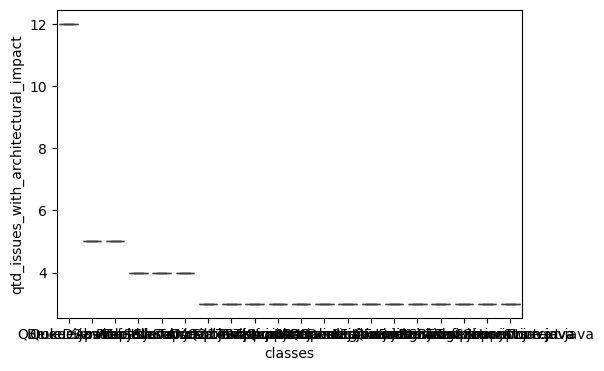

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='classes', y='qtd_issues_with_architectural_impact', data=data)

In [ ]:
df_new_data2 = pd.read_excel('top20classesactivemq2.xlsx')
df_new_data2

,classes,qtd_issues_with_architectural_impact,critical_class2,critical_class
0,Queue.java,12,1,yes
1,BrokerService.java,5,1,yes
2,QueueDispatchSelector.java,5,1,yes
3,AbstractStoreCursor.java,4,0,no
4,PrefetchSubscription.java,4,0,no
5,Topic.java,4,0,no
6,BaseDestination.java,3,0,no
7,AMQ2149Test.java,3,0,no
8,RegionBroker.java,3,0,no
9,KahaReferenceStore.java,3,0,no


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


<Axes: xlabel='critical_class', ylabel='qtd_issues_with_architectural_impact'>

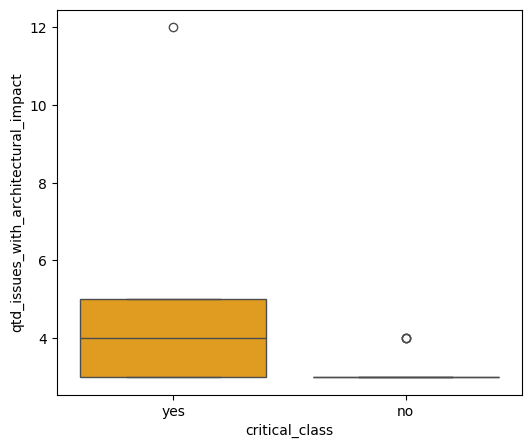

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='critical_class', y='qtd_issues_with_architectural_impact', data=df_new_data2, hue="critical_class", legend='auto', palette=['orange', 'yellow'])